### **Libraries**

In [1]:
import gc
import warnings
import numpy as np
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Plots
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

%matplotlib inline
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Take the ForestTypes Dataset which has train and test as seperate files.**

In [2]:
train= pd.read_csv('training.csv')
test= pd.read_csv('testing.csv')

### **Combine the train and test as single file.**


In [3]:
df = pd.concat([train, test], axis=0)
pd.set_option("display.max_columns", df.shape[1])

In [4]:
df.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,75.70,14.86,40.35,7.97,-32.92,-38.92,-14.94,4.47,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,30.58,20.42,39.83,-16.74,-24.92,-36.33,-15.67,8.16,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,63.20,26.70,49.28,3.25,-24.89,-30.38,-3.60,4.15,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,55.54,24.50,47.90,-6.20,-20.98,-30.28,-5.03,7.77,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,59.44,2.62,32.02,-1.33,-37.99,-43.57,-34.25,1.83,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [5]:
df.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,59.887189,39.380497,62.304015,98.156788,58.338432,99.747610,87.657744,27.873805,59.726577,53.906004,11.567782,34.060000,-0.276138,-33.011644,-39.494895,-10.995258,1.843002,-4.194283,-20.017304,-1.056195,-4.368203,-21.411568,-0.977514,-4.619809,-18.937228,-1.652199,-4.201377
std,12.345004,15.930120,15.937658,12.881210,11.336637,10.151598,16.398751,8.076700,9.291151,12.754964,16.311623,16.746541,13.222536,11.277147,9.951563,16.476999,8.159354,9.306667,3.806830,1.375642,2.053012,4.901451,0.495208,1.352096,4.147427,1.371180,1.518350
min,31.000000,23.000000,47.000000,54.000000,43.000000,83.000000,42.000000,19.000000,45.000000,4.950000,-112.600000,-106.120000,-77.010000,-74.560000,-77.170000,-62.740000,-54.740000,-58.280000,-32.950000,-8.800000,-11.210000,-40.370000,-3.270000,-8.730000,-34.140000,-8.870000,-10.830000
25%,51.500000,28.000000,52.000000,90.000000,50.000000,93.000000,76.000000,24.000000,54.500000,45.565000,3.190000,28.050000,-8.635000,-38.470000,-43.725000,-21.845000,2.535000,-5.025000,-22.505000,-1.795000,-5.625000,-24.175000,-1.210000,-5.525000,-21.820000,-2.370000,-4.940000
50%,58.000000,32.000000,56.000000,96.000000,55.000000,97.000000,88.000000,25.000000,57.000000,55.410000,18.860000,39.830000,1.760000,-28.950000,-36.520000,-11.540000,4.300000,-1.880000,-19.990000,-1.030000,-4.460000,-20.830000,-0.980000,-4.640000,-19.050000,-1.580000,-4.130000
75%,67.000000,48.000000,67.000000,107.000000,64.000000,104.000000,99.000000,27.000000,60.000000,62.340000,22.675000,44.620000,8.870000,-24.660000,-32.415000,0.400000,5.680000,0.915000,-18.080000,-0.300000,-2.840000,-18.735000,-0.730000,-3.810000,-16.610000,-0.915000,-3.245000
max,107.000000,160.000000,196.000000,172.000000,100.000000,138.000000,139.000000,84.000000,114.000000,86.080000,29.900000,57.550000,40.820000,-18.400000,-23.550000,34.660000,10.830000,9.580000,5.130000,12.460000,7.370000,1.880000,3.440000,3.940000,3.670000,8.840000,7.790000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 0 to 324
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                523 non-null    object 
 1   b1                   523 non-null    int64  
 2   b2                   523 non-null    int64  
 3   b3                   523 non-null    int64  
 4   b4                   523 non-null    int64  
 5   b5                   523 non-null    int64  
 6   b6                   523 non-null    int64  
 7   b7                   523 non-null    int64  
 8   b8                   523 non-null    int64  
 9   b9                   523 non-null    int64  
 10  pred_minus_obs_H_b1  523 non-null    float64
 11  pred_minus_obs_H_b2  523 non-null    float64
 12  pred_minus_obs_H_b3  523 non-null    float64
 13  pred_minus_obs_H_b4  523 non-null    float64
 14  pred_minus_obs_H_b5  523 non-null    float64
 15  pred_minus_obs_H_b6  523 non-null    flo

In [7]:
df.shape

(523, 28)

In [8]:
df.isnull().sum()

class                  0
b1                     0
b2                     0
b3                     0
b4                     0
b5                     0
b6                     0
b7                     0
b8                     0
b9                     0
pred_minus_obs_H_b1    0
pred_minus_obs_H_b2    0
pred_minus_obs_H_b3    0
pred_minus_obs_H_b4    0
pred_minus_obs_H_b5    0
pred_minus_obs_H_b6    0
pred_minus_obs_H_b7    0
pred_minus_obs_H_b8    0
pred_minus_obs_H_b9    0
pred_minus_obs_S_b1    0
pred_minus_obs_S_b2    0
pred_minus_obs_S_b3    0
pred_minus_obs_S_b4    0
pred_minus_obs_S_b5    0
pred_minus_obs_S_b6    0
pred_minus_obs_S_b7    0
pred_minus_obs_S_b8    0
pred_minus_obs_S_b9    0
dtype: int64

### **Perform Univariate analysis of features and draw your inferences from it**


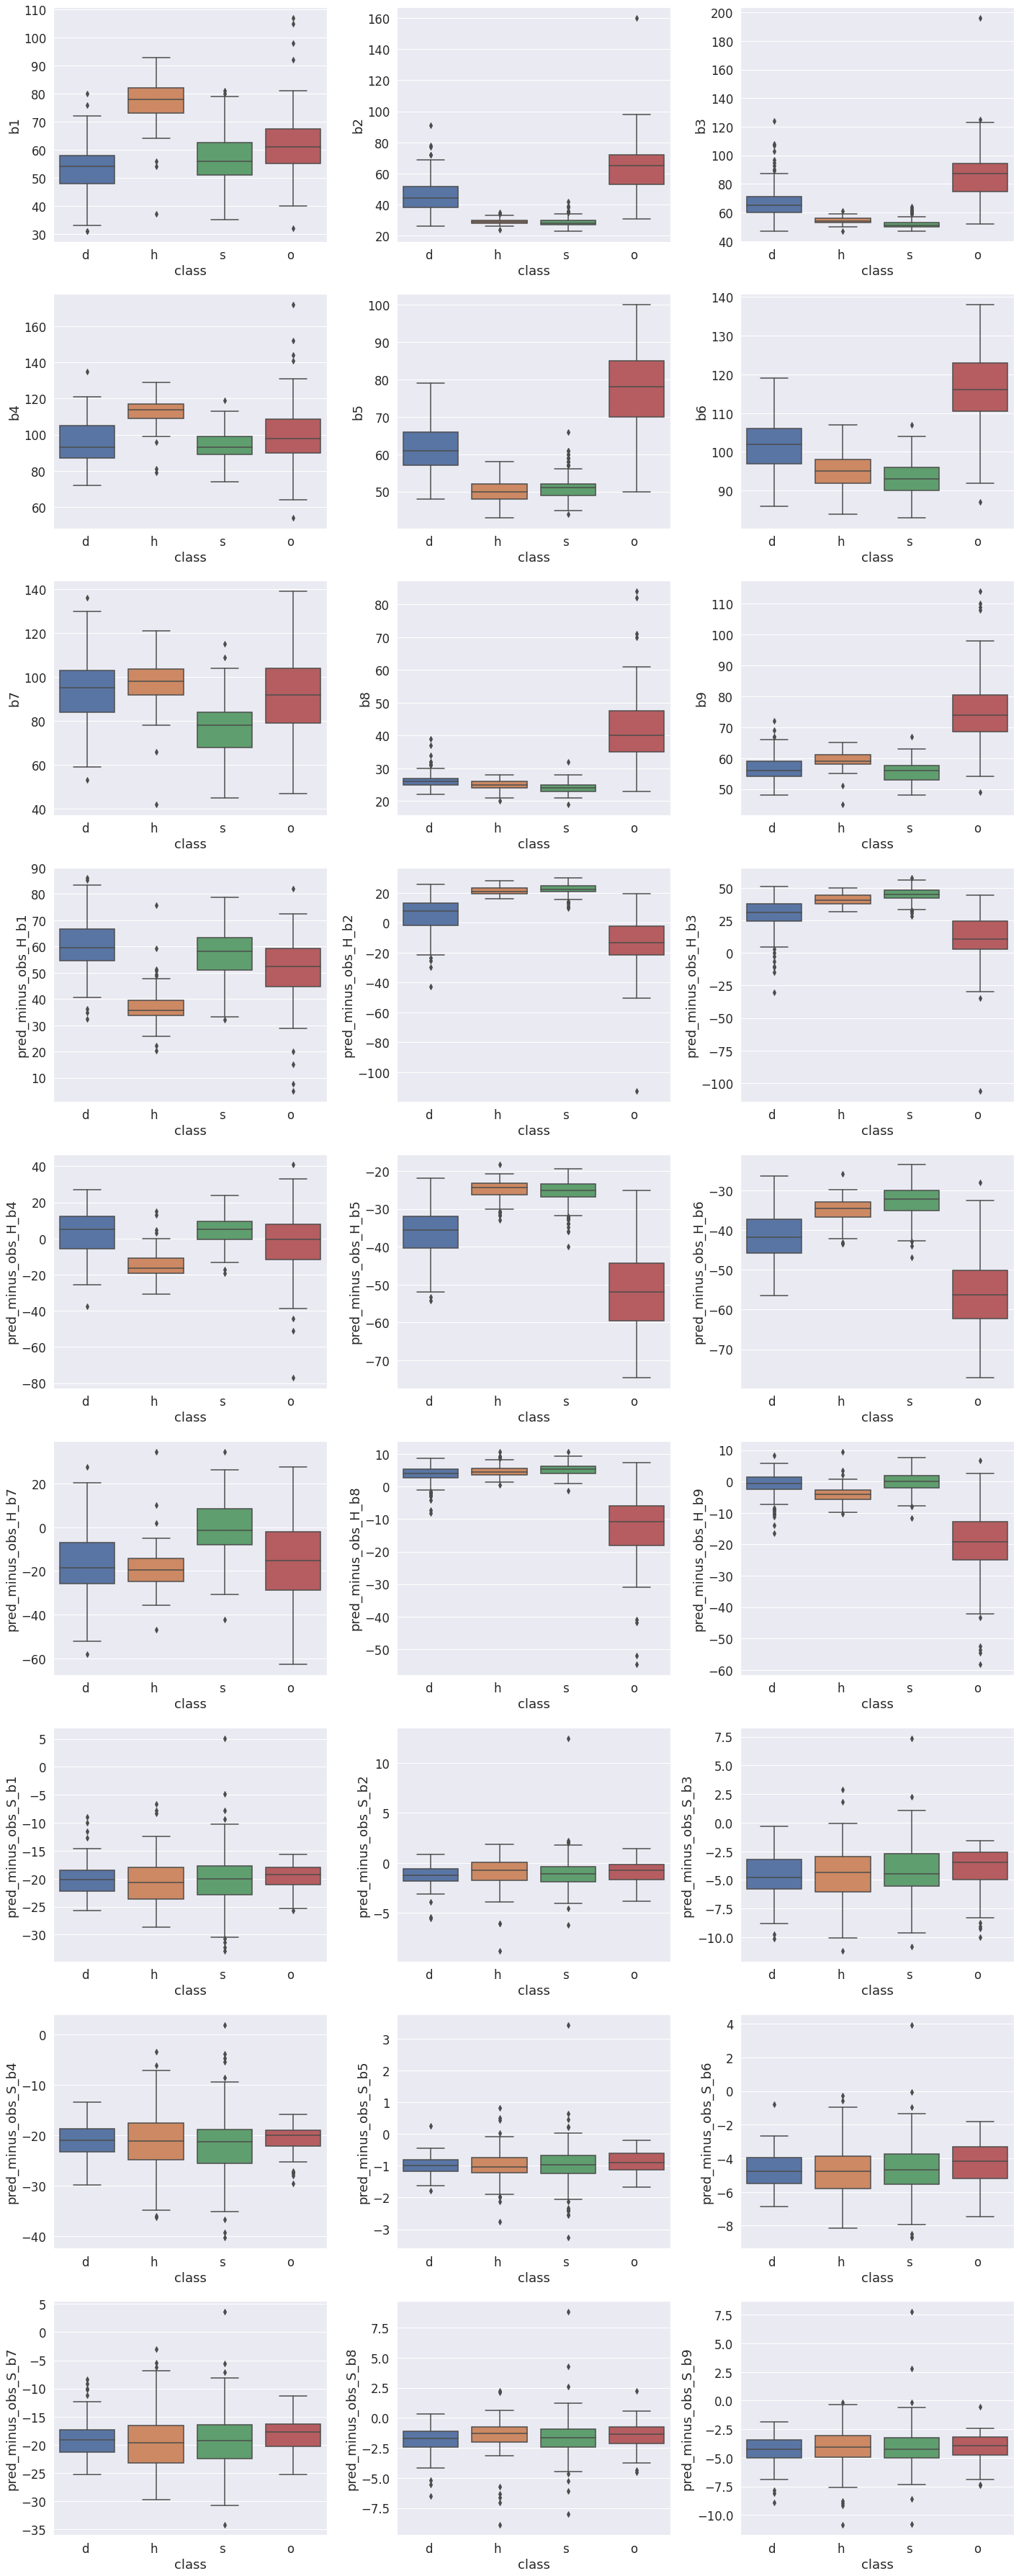

In [9]:
temp = df.iloc[:, 1:]
sns.set(font_scale=1.5)
fig, ax = plt.subplots(ncols=3, nrows=9, figsize=(20, 50))
index = 0
ax = ax.flatten()
for key, val in temp.items():
    sns.boxplot(x=df["class"], y=key, data=temp, ax=ax[index])
    index += 1
plt.tight_layout()

### **Use statistical test , apart from heatmap to get the collinearity among features**


In [10]:
X = df.drop("class", axis=1)

for i in range(len(X.columns)):
  v = vif(np.matrix(X), i)
  print(f"Variance inflation factor for {X.columns[i]} => {round(v, 2)}")

Variance inflation factor for b1 => 5710.45
Variance inflation factor for b2 => 13179.19
Variance inflation factor for b3 => 17164.68
Variance inflation factor for b4 => 5034.51
Variance inflation factor for b5 => 415280.26
Variance inflation factor for b6 => 308853.53
Variance inflation factor for b7 => 12518.48
Variance inflation factor for b8 => 23275.48
Variance inflation factor for b9 => 57742.6
Variance inflation factor for pred_minus_obs_H_b1 => 4471.36
Variance inflation factor for pred_minus_obs_H_b2 => 2805.13
Variance inflation factor for pred_minus_obs_H_b3 => 5726.84
Variance inflation factor for pred_minus_obs_H_b4 => 81.25
Variance inflation factor for pred_minus_obs_H_b5 => 142193.16
Variance inflation factor for pred_minus_obs_H_b6 => 49966.21
Variance inflation factor for pred_minus_obs_H_b7 => 607.23
Variance inflation factor for pred_minus_obs_H_b8 => 1928.65
Variance inflation factor for pred_minus_obs_H_b9 => 1640.06
Variance inflation factor for pred_minus_obs_S_

In [11]:
mod_df = df.drop(['pred_minus_obs_H_b1','b3','pred_minus_obs_H_b3','pred_minus_obs_H_b4','pred_minus_obs_H_b6','b6','pred_minus_obs_H_b7','b8','pred_minus_obs_H_b8','pred_minus_obs_S_b1','pred_minus_obs_S_b8','pred_minus_obs_H_b2','pred_minus_obs_H_b5','pred_minus_obs_H_b9'], axis=1)

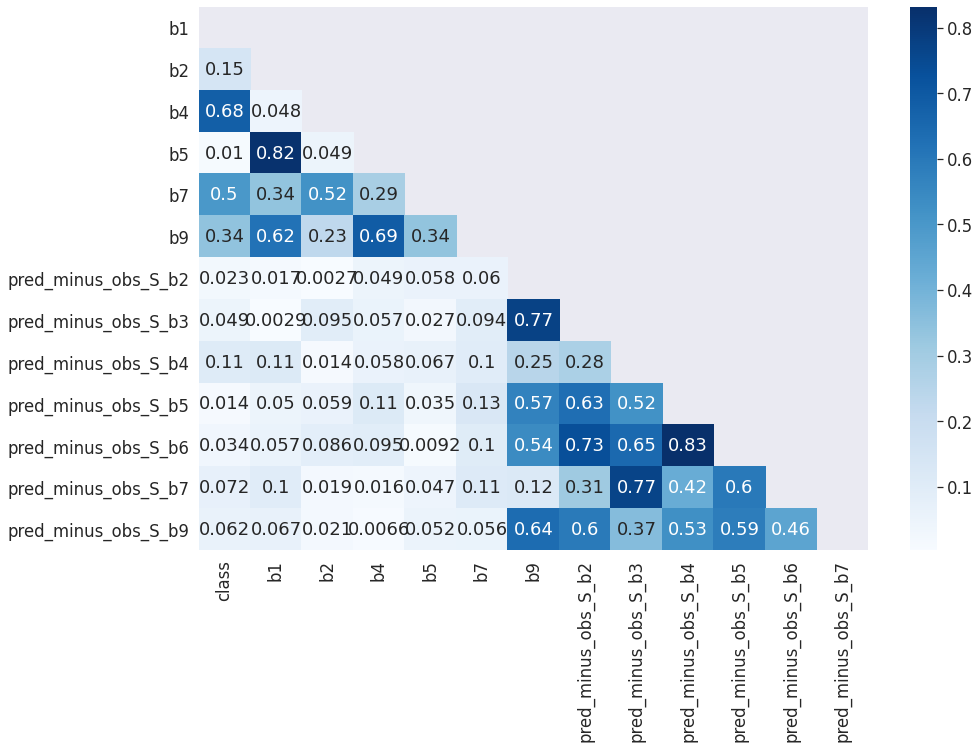

In [12]:
df_corr = mod_df.corr().abs()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(
  df_corr,
  cmap="Blues",
  mask=mask,
  xticklabels=df_corr.columns.values,
  yticklabels=df_corr.columns.values,
  annot=True,
  ax=ax
)
ax.set_xticklabels(mod_df.columns)
plt.show()

### **Draw relationships among 3-4 features and get insights from it**


In [13]:
mod_df.head()

,class,b1,b2,b4,b5,b7,b9,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b9
0,d,39,36,91,59,93,60,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-7.86
1,h,84,30,112,51,92,62,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-10.83
2,s,53,25,99,51,84,58,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-7.07
3,s,59,26,103,47,82,56,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-10.81
4,d,57,49,103,64,114,59,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-5.84


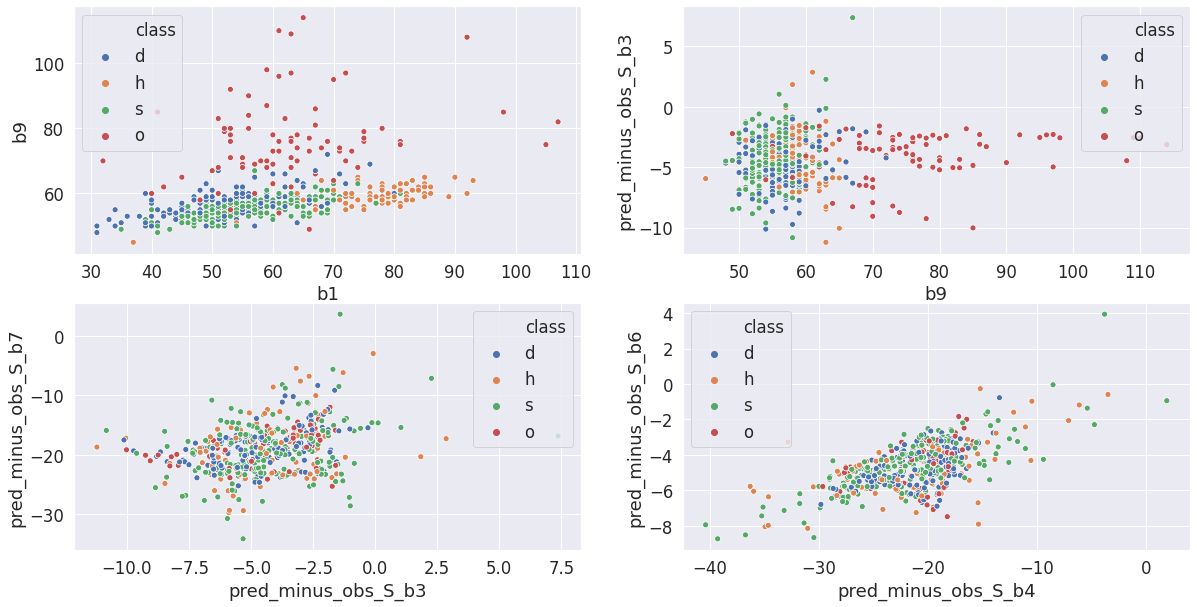

In [14]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 10), sharex=False)
ax = ax.flatten()
sns.scatterplot(mod_df["b1"], mod_df["b9"], hue=mod_df["class"], ax=ax[0])
sns.scatterplot(mod_df["b9"], mod_df["pred_minus_obs_S_b3"], hue=mod_df["class"], ax=ax[1])
sns.scatterplot(mod_df["pred_minus_obs_S_b3"], mod_df["pred_minus_obs_S_b7"], hue=mod_df["class"], ax=ax[2])
sns.scatterplot(mod_df["pred_minus_obs_S_b4"], mod_df["pred_minus_obs_S_b6"], hue=mod_df["class"], ax=ax[3])
plt.show()

In [15]:
mod_df['class'].unique()

array(['d ', 'h ', 's ', 'o '], dtype=object)

In [16]:
mod_df['class'] = mod_df['class'].map({'d ':0, 'h ':1, 's ':2,'o ':3})
mod_df.head()

,class,b1,b2,b4,b5,b7,b9,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b9
0,0,39,36,91,59,93,60,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-7.86
1,1,84,30,112,51,92,62,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-10.83
2,2,53,25,99,51,84,58,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-7.07
3,2,59,26,103,47,82,56,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-10.81
4,0,57,49,103,64,114,59,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-5.84


### **Use Min-Max Scaling of features, and plot the graph showing the difference before scaling and after scaling.**


In [17]:
X = mod_df.drop("class", axis=1)
Y = mod_df["class"]

In [18]:
scaler= MinMaxScaler()
cols = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=cols)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=100, test_size=0.25)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(392, 13)
(392,)
(131, 13)
(131,)


### **Make use of PCA in reducing the dimensionality**


In [20]:
pca = PCA(svd_solver='randomized', random_state=100)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

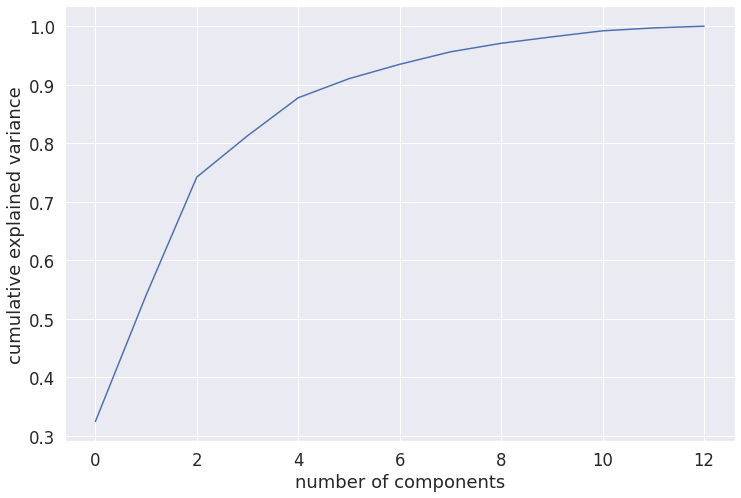

In [21]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('number of components')
ax.set_ylabel('cumulative explained variance')
plt.show()

In [22]:
pca_model = IncrementalPCA(n_components=7)

In [23]:
df_train_pca = pca_model.fit_transform(X_train)
df_train_pca.shape

(392, 7)

In [24]:
# Test
df_test_pca = pca_model.transform(X_test)
df_test_pca.shape

(131, 7)

In [25]:
svc_model = SVC(C=0.1, kernel='rbf')
svc_model.fit(df_train_pca, Y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
y_test_pred = svc_model.predict(df_test_pca)

In [27]:
confusion_matrix(Y_test, y_test_pred)

array([[32,  0,  3,  2],
       [ 0, 15,  4,  0],
       [ 2,  3, 47,  0],
       [ 2,  0,  2, 19]])

In [28]:
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        37
           1       0.83      0.79      0.81        19
           2       0.84      0.90      0.87        52
           3       0.90      0.83      0.86        23

    accuracy                           0.86       131
   macro avg       0.87      0.85      0.86       131
weighted avg       0.86      0.86      0.86       131



### **Verify the effect of C parameter and gamma function. Plot the accuracy of train and test score**


### **Fine-tune the parameter in SVM by using GridSearchCV.**


In [29]:
# creating a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [30]:
hyper_params = [
  {
    'gamma': [1e-2, 1e-3, 1e-4],
    'C': [1, 10, 100, 1000]
  }
]

In [31]:
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(
  estimator = model, 
  param_grid = hyper_params, 
  scoring= 'accuracy', 
  cv = folds, 
  verbose = 1,
  return_train_score=True
)

# fit the model
model_cv.fit(df_train_pca, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [32]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

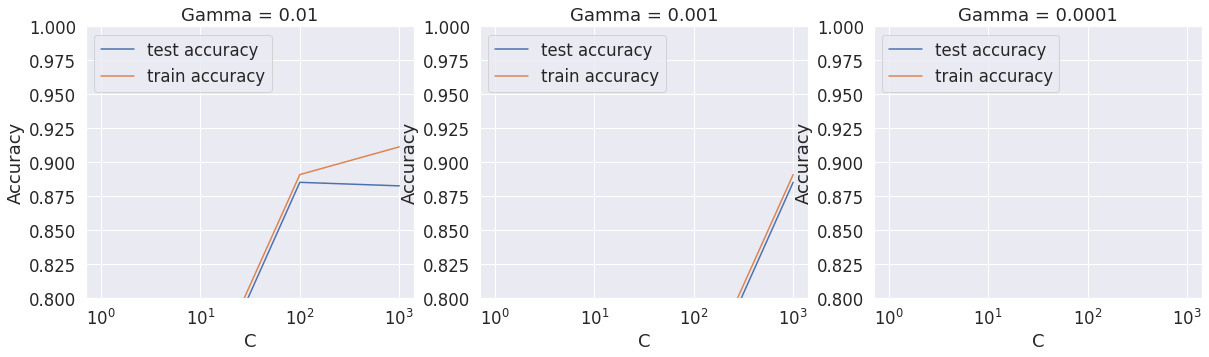

In [33]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 5))

for indx, gamma in enumerate([0.01, 0.001, 0.0001]):
	gamma_res = cv_results[cv_results['param_gamma']==gamma]

	ax[indx].plot(gamma_res.param_C, gamma_res.mean_test_score)
	ax[indx].plot(gamma_res.param_C, gamma_res.mean_train_score)
	ax[indx].set_xlabel("C")
	ax[indx].set_ylabel("Accuracy")
	ax[indx].set_title(f"Gamma = {gamma}")
	ax[indx].set_ylim([0.80, 1])
	ax[indx].legend(['test accuracy', 'train accuracy'], loc='upper left')
	ax[indx].set_xscale('log')

In [34]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print(f"The best test score is {best_score} corresponding to hyperparameters {best_hyperparams}")

The best test score is 0.8852645245050308 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


In [35]:
# Building model with best parameters
model = SVC(C=100, gamma=0.01, kernel="rbf")

model.fit(df_train_pca, Y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
y_test_pred_2 = model.predict(df_test_pca)

In [37]:
confusion_matrix(Y_test, y_test_pred_2)

array([[32,  0,  3,  2],
       [ 0, 16,  3,  0],
       [ 3,  4, 45,  0],
       [ 1,  0,  2, 20]])

In [38]:
print(classification_report(Y_test, y_test_pred_2))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        37
           1       0.80      0.84      0.82        19
           2       0.85      0.87      0.86        52
           3       0.91      0.87      0.89        23

    accuracy                           0.86       131
   macro avg       0.86      0.86      0.86       131
weighted avg       0.86      0.86      0.86       131

